# Team Moneyball

## Project Description: 

### Press Sports App users share an environment to engage with others who share similar interests. We are searching for a method to analyze and understand the driving factors of engagement with the app and other users around the country.


In [1]:
# Import dependencies 

In [2]:
# Dependecies and Setup 
import os
import csv 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# File to Load 
user_data_csv= "user_data.csv"

# Store into Pandas DataFrames
df = pd.read_csv(user_data_csv)



In [3]:
# Display the dataframe head

In [4]:
df.head()

,userId,daysOld,sport,level,classOf,state,school,schoolCount,club,clubCount,...,fanUpOnSuggestedUsers,myProfileViewed,rankingsViewed,postLikes,notificationsReceived,total_invites,daysSinceActive,daysActiveLast30,ActiveLast7,Unnamed: 29
0,v8FXVdBmWTMKygrfh0K24WHm0403,818,Baseball,High School,2024,TX,Pine Tree High School,6.0,Phenom Baseball,5.0,...,11,209,453,1373,2691,3,0,23,1,NaN
1,o16OVYwvfgYiDDzcSsQYDI8ua6d2,734,Baseball,High School,2025,GA,Savannah Christian Preparatory School,2.0,Canes Simpson,3.0,...,1,17,7,62,241,0,97,0,0,NaN
2,wLT1TgISsyeJcRocy682tp3SFD92,695,Baseball,High School,2023,GA,Dutchtown High School,1.0,NaN,NaN,...,3,127,476,1448,2360,0,171,0,0,NaN
3,AaOw4PLV3ZYp3AOVwODmqs1F6zW2,695,Baseball,High School,2023,MI,Rochester High School,10.0,South Oakland A's,18.0,...,0,21,31,49,338,0,4,5,1,NaN
4,7QqiKKMwZqe7JXhJb6NXCsui5au1,695,Baseball,High School,2025,IA,Clinton High School,5.0,NaN,NaN,...,10,262,69,42,776,2,0,18,1,NaN


In [5]:
user_count= df["userId"].nunique()
user_count

31212

In [6]:
# Begin data cleaning to fill blank cells and create new categories for users

In [7]:
df['school'] = df['school'].fillna('No_School')

In [8]:
df['club'] = df['club'].fillna('No_Club')

In [9]:
df['clubCount'] = df['clubCount'].fillna(0)
df['interests'] = df['interests'].fillna('None')

In [11]:
df['state'] = df['state'].fillna('No_State')


In [12]:
df['schoolCount'] = df['schoolCount'].fillna(0)


In [13]:
# userId = df['userId']
# interest_count = []
# # we need to convert df['interests'] to a list, then find the length of the list. Didn't have time to get to this
# for each in range(len(userId)):
#     count = len(df['interests'][each].split(','))
#     interest_count.append(count)

# df['interest count'] = interest_count
# df.head()

In [33]:
x_values=df['notificationsReceived']
y_values = df['totalActions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
rvalue

0.7641917829655478

The r-squared is: 0.5839890811520624


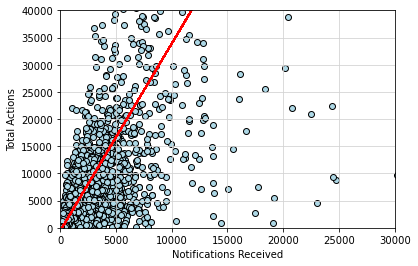

In [14]:
x_values = df['notificationsReceived']
y_values = df['totalActions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('Notifications Received')
plt.ylabel('Total Actions')
plt.ylim(0,40000)
plt.xlim(0,30000)
plt.savefig("Notifications Received vs Actions.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5107013991561755


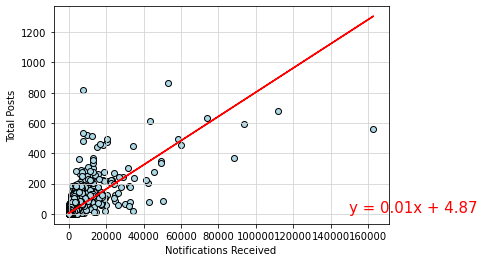

In [15]:
x_values = df['notificationsReceived']
y_values = df['posts']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('Notifications Received')
plt.ylabel('Total Posts')
# plt.ylim(0,40000)
# plt.xlim(0,30000)
plt.savefig("Notifications Received vs Posts.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.61377807977504


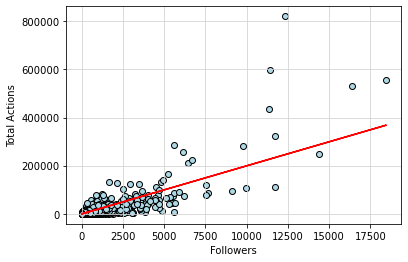

In [16]:
x_values = df['followers']
y_values = df['totalActions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('Followers')
plt.ylabel('Total Actions')
# plt.ylim(0,40000)
# plt.xlim(0,30000)
plt.savefig("Followers vs Actions.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.31014429768597107


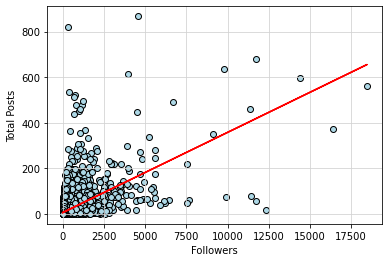

In [20]:
x_values = df['followers']
y_values = df['posts']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('Followers')
plt.ylabel('Total Posts')
# plt.ylim(0,40000)
# plt.xlim(0,30000)
plt.savefig("Followers vs Posts.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [21]:
# x_values = df['rankingsViewed']
# y_values = df['totalActions']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
# plt.xlabel('Rankings Viewed')
# plt.ylabel('Total Actions')
# # plt.ylim(0,40000)
# # plt.xlim(0,30000)
# plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

In [22]:
# x_values = df['rankingsViewed']
# y_values = df['posts']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
# plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
# plt.xlabel('Rankings Viewed')
# plt.ylabel('Posts')
# # plt.ylim(0,40000)
# # plt.xlim(0,30000)
# plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

The r-squared is: 0.0005033689007850054


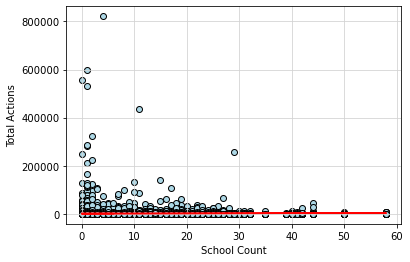

In [23]:
x_values = df['schoolCount']
y_values = df['totalActions']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('School Count')
plt.ylabel('Total Actions')
# plt.ylim(0,40000)
# plt.xlim(0,30000)
plt.savefig("School Count vs Actions.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.004256282584207939


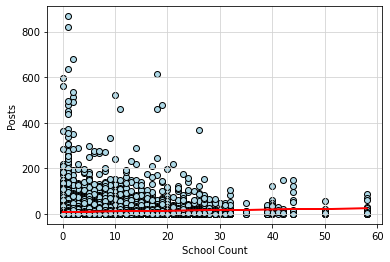

In [27]:
x_values = df['schoolCount']
y_values = df['posts']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,edgecolors="black",facecolors="lightblue")
plt.grid (visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(150000,10),fontsize=15,color="red")
plt.xlabel('School Count')
plt.ylabel('Posts')
# plt.ylim(0,40000)
# plt.xlim(0,30000)
plt.savefig("School Count vs Posts.png")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [25]:
# define retention (someone who is active)
retention = []

for days in df.daysActiveLast30:
    if days > 0:
        retention.append(True)
    else:
        retention.append(False)
        
df['retention'] = retention
df.head()
df_ret = df[df.retention == True]
df_noret = df[df.retention == False]

#average number of posts for those who are currently active
df_ret['posts'].mean()

14.096464394963363

In [26]:
#average number of posts for those who are not currently active
df_noret['posts'].mean()

6.143106965899155